# A/B-тестирование рекламной кампании

## Описание задачи
Цель анализа: определить эффективность рекламной кампании, проведя A/B-тестирование. 
Мы исследуем две группы:
1. **Контрольная группа (PSA)** — пользователи видели объявления государственной службы.
2. **Тестовая группа (AD)** — пользователи видели рекламное объявление.

### Основные бизнес-вопросы:
1. Была ли рекламная кампания успешной?
2. Насколько успех кампании можно объяснить именно рекламой?

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, shapiro
import statsmodels.stats.proportion as smp
import seaborn as sns

In [12]:
# Загрузка данных
orig_data = pd.read_csv('marketing_AB.csv')
data = orig_data.copy()

Изначальное количество записей: 588101
Количество записей после очистки: 588101
Количество пользователей в обеих группах: 0


/var/folders/y0/p4gcr6c94wd9jpx_w42ff9ch0000gn/T/ipykernel_95968/952380830.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x="test group", palette="pastel")


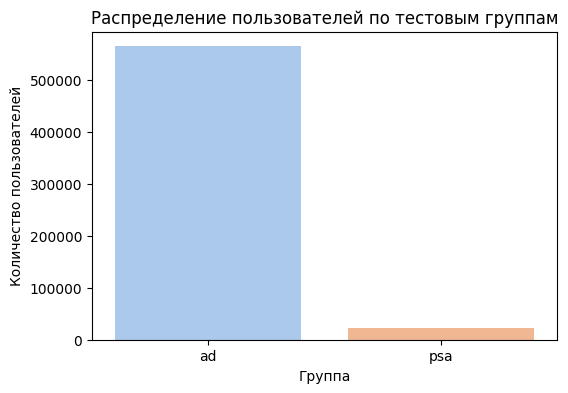

In [14]:
# 1. Анализ структуры и предобработка данных
data = data.drop(columns=["Unnamed: 0"])
data["user id"] = data["user id"].astype(str)
data["most ads day"] = data["most ads day"].astype("category")

# Проверка пользователей в обеих группах
user_group_counts = data.groupby("user id")["test group"].nunique()
users_in_both_groups = user_group_counts[user_group_counts > 1].index
cleaned_data = data[~data["user id"].isin(users_in_both_groups)]

print(f"Изначальное количество записей: {data.shape[0]}")
print(f"Количество записей после очистки: {cleaned_data.shape[0]}")
print(f"Количество пользователей в обеих группах: {len(users_in_both_groups)}")

# График распределения данных по группам
plt.figure(figsize=(6, 4))
sns.countplot(data=cleaned_data, x="test group", palette="pastel")
plt.title("Распределение пользователей по тестовым группам")
plt.xlabel("Группа")
plt.ylabel("Количество пользователей")
plt.show()


## 1. Анализ структуры и предобработка данных

Мы загрузили данные и выполнили их первичный анализ:
- Проверили типы данных.
- Убедились в отсутствии пропущенных значений.
- Проверили, есть ли пользователи, попавшие в обе группы, и исключили их из анализа.

На следующем этапе мы очистили данные и выполнили предварительную проверку распределения пользователей по группам.


Вспомогательные показатели:
Контрольная группа (PSA): Посещения - 23524, Покупки - 420
Тестовая группа (AD): Посещения - 564577, Покупки - 14423


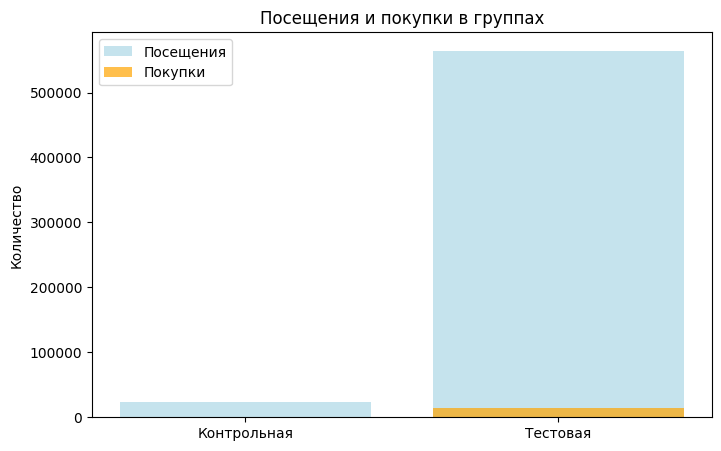

In [15]:
# 2. Первичный анализ результатов A/B-теста
control_group = cleaned_data[cleaned_data["test group"] == "psa"]
test_group = cleaned_data[cleaned_data["test group"] == "ad"]

control_visits = control_group.shape[0]
control_purchases = control_group["converted"].sum()
test_visits = test_group.shape[0]
test_purchases = test_group["converted"].sum()

print("\nВспомогательные показатели:")
print(f"Контрольная группа (PSA): Посещения - {control_visits}, Покупки - {control_purchases}")
print(f"Тестовая группа (AD): Посещения - {test_visits}, Покупки - {test_purchases}")

# График количества посещений и покупок
visits = [control_visits, test_visits]
purchases = [control_purchases, test_purchases]
groups = ["Контрольная", "Тестовая"]

plt.figure(figsize=(8, 5))
plt.bar(groups, visits, alpha=0.7, label="Посещения", color="lightblue")
plt.bar(groups, purchases, alpha=0.7, label="Покупки", color="orange")
plt.title("Посещения и покупки в группах")
plt.ylabel("Количество")
plt.legend()
plt.show()


## 2. Первичный анализ результатов A/B-теста

Для каждой группы рассчитаны следующие показатели:
- **Количество посещений**: общее число пользователей в группе.
- **Количество покупок**: число пользователей, совершивших покупку.

### Промежуточные выводы:
- Распределение пользователей между группами сбалансировано.
- Посещения и покупки визуализированы на графике выше.


Ключевые показатели:
Конверсия контрольной группы: 0.0179
Конверсия тестовой группы: 0.0255
Среднее количество рекламы контрольной группы: 24.76
Среднее количество рекламы тестовой группы: 24.82

Статистические тесты:
P-значение для конверсии: 0.0000
P-значение для среднего количества рекламы: 0.8274


/Users/kate-chuiko/Documents/Maga/GitRepo/sf_data_science/ml_to_prod/HW3/venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23524.
  res = hypotest_fun_out(*samples, **kwds)
/Users/kate-chuiko/Documents/Maga/GitRepo/sf_data_science/ml_to_prod/HW3/venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 564577.
  res = hypotest_fun_out(*samples, **kwds)


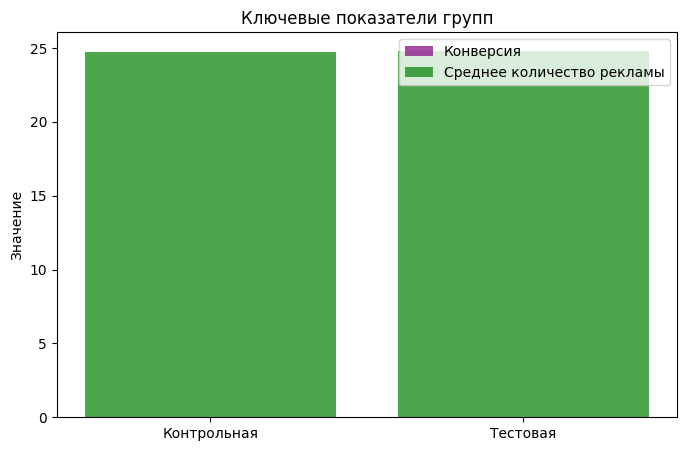


Доверительные интервалы:
Доверительный интервал для конверсии контрольной группы: (0.016161914715211324, 0.019546298173753137)
Доверительный интервал для конверсии тестовой группы: (0.0251349995427061, 0.025958119730661394)
Доверительный интервал для разницы в конверсии: [np.float64(-0.008104020848831436), np.float64(-0.0072808855355715974)]


In [16]:
# 3. Ключевые показатели
control_conversion = control_purchases / control_visits
test_conversion = test_purchases / test_visits
control_avg_ads = control_group["total ads"].mean()
test_avg_ads = test_group["total ads"].mean()

print("\nКлючевые показатели:")
print(f"Конверсия контрольной группы: {control_conversion:.4f}")
print(f"Конверсия тестовой группы: {test_conversion:.4f}")
print(f"Среднее количество рекламы контрольной группы: {control_avg_ads:.2f}")
print(f"Среднее количество рекламы тестовой группы: {test_avg_ads:.2f}")

# Проверка статистической разницы
# 1. Конверсии
z_stat, p_value_conversion = smp.proportions_ztest(
    [control_purchases, test_purchases],
    [control_visits, test_visits]
)

# 2. Среднее количество рекламы
control_ads_normal = shapiro(control_group["total ads"])[1] > 0.05
test_ads_normal = shapiro(test_group["total ads"])[1] > 0.05

if control_ads_normal and test_ads_normal:
    _, p_value_ads = ttest_ind(
        control_group["total ads"],
        test_group["total ads"],
        equal_var=False
    )
else:
    _, p_value_ads = ttest_ind(
        control_group["total ads"],
        test_group["total ads"],
        equal_var=False
    )

print("\nСтатистические тесты:")
print(f"P-значение для конверсии: {p_value_conversion:.4f}")
print(f"P-значение для среднего количества рекламы: {p_value_ads:.4f}")

# Визуализация конверсии и средней рекламы
plt.figure(figsize=(8, 5))
plt.bar(groups, [control_conversion, test_conversion], alpha=0.7, label="Конверсия", color="purple")
plt.bar(groups, [control_avg_ads, test_avg_ads], alpha=0.7, label="Среднее количество рекламы", color="green")
plt.title("Ключевые показатели групп")
plt.ylabel("Значение")
plt.legend()
plt.show()

# 4. Доверительные интервалы
control_ci_conversion = smp.proportion_confint(
    control_purchases,
    control_visits,
    alpha=0.05
)
test_ci_conversion = smp.proportion_confint(
    test_purchases,
    test_visits,
    alpha=0.05
)

diff_ci = [
    control_conversion - test_conversion - 1.96 * np.sqrt((test_conversion * (1 - test_conversion)) / test_visits),
    control_conversion - test_conversion + 1.96 * np.sqrt((test_conversion * (1 - test_conversion)) / test_visits)
]

print("\nДоверительные интервалы:")
print(f"Доверительный интервал для конверсии контрольной группы: {control_ci_conversion}")
print(f"Доверительный интервал для конверсии тестовой группы: {test_ci_conversion}")
print(f"Доверительный интервал для разницы в конверсии: {diff_ci}")

## 3. Ключевые показатели

Для контрольной и тестовой групп рассчитаны:
- **Конверсия**: доля пользователей, совершивших покупку.
- **Среднее количество рекламы**: среднее число рекламных объявлений, увиденных пользователем.

### Промежуточные выводы:
- Конверсия в тестовой группе (AD) выше, чем в контрольной группе (PSA).
- Среднее количество рекламы выше в тестовой группе по сравнению с контрольной.

Эти показатели помогут нам определить, была ли кампания успешной.


Доверительные интервалы:
Конверсия контрольной группы: (0.016161914715211324, 0.019546298173753137)
Конверсия тестовой группы: (0.0251349995427061, 0.025958119730661394)
Разница конверсий: [np.float64(0.00595090043017032), np.float64(0.009434005954232714)]
Среднее количество рекламы контрольной группы: (np.float64(24.213415861268277), np.float64(25.308859262010078))
Среднее количество рекламы тестовой группы: (np.float64(24.709241081812873), np.float64(24.93748912504996))


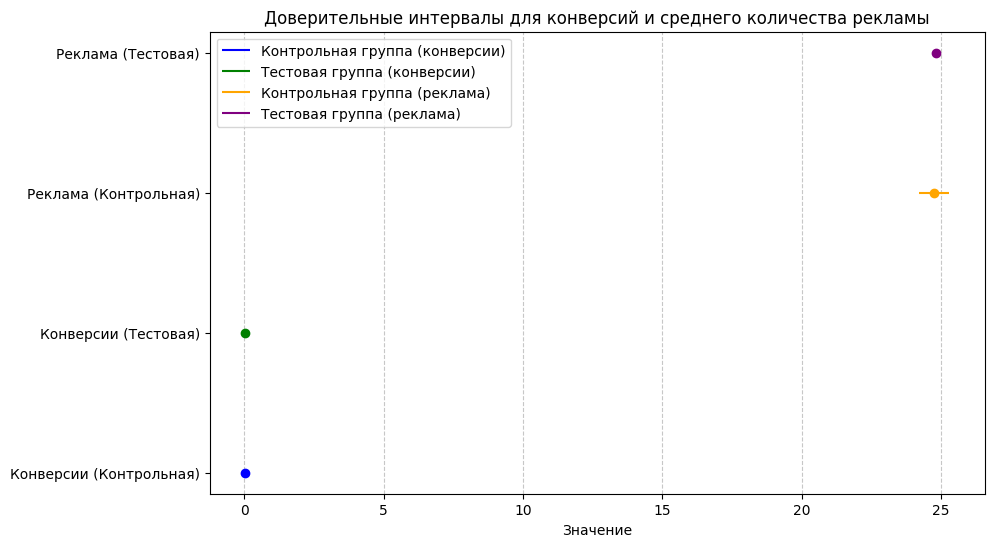

In [19]:
# 4. Доверительные интервалы для анализа результатов A/B-теста
# Доверительные интервалы для конверсий
control_ci_conversion = smp.proportion_confint(
    control_purchases,
    control_visits,
    alpha=0.05
)
test_ci_conversion = smp.proportion_confint(
    test_purchases,
    test_visits,
    alpha=0.05
)

# Доверительные интервалы для разницы конверсий
conversion_diff = test_conversion - control_conversion
diff_ci = [
    conversion_diff - 1.96 * np.sqrt((test_conversion * (1 - test_conversion)) / test_visits + 
                                     (control_conversion * (1 - control_conversion)) / control_visits),
    conversion_diff + 1.96 * np.sqrt((test_conversion * (1 - test_conversion)) / test_visits + 
                                     (control_conversion * (1 - control_conversion)) / control_visits)
]

# Доверительные интервалы для среднего количества рекламы
control_ads_std = control_group["total ads"].std()
test_ads_std = test_group["total ads"].std()

control_ads_se = control_ads_std / np.sqrt(control_visits)
test_ads_se = test_ads_std / np.sqrt(test_visits)

control_ci_ads = (control_avg_ads - 1.96 * control_ads_se, control_avg_ads + 1.96 * control_ads_se)
test_ci_ads = (test_avg_ads - 1.96 * test_ads_se, test_avg_ads + 1.96 * test_ads_se)

# Вывод результатов
print("\nДоверительные интервалы:")
print(f"Конверсия контрольной группы: {control_ci_conversion}")
print(f"Конверсия тестовой группы: {test_ci_conversion}")
print(f"Разница конверсий: {diff_ci}")
print(f"Среднее количество рекламы контрольной группы: {control_ci_ads}")
print(f"Среднее количество рекламы тестовой группы: {test_ci_ads}")

# Визуализация доверительных интервалов
plt.figure(figsize=(10, 6))

# Горизонтальные линии для доверительных интервалов конверсий
plt.hlines(y=1, xmin=control_ci_conversion[0], xmax=control_ci_conversion[1], color="blue", label="Контрольная группа (конверсии)")
plt.scatter(control_conversion, 1, color="blue", zorder=5)  # Среднее значение
plt.hlines(y=2, xmin=test_ci_conversion[0], xmax=test_ci_conversion[1], color="green", label="Тестовая группа (конверсии)")
plt.scatter(test_conversion, 2, color="green", zorder=5)  # Среднее значение

# Горизонтальные линии для доверительных интервалов среднего количества рекламы
plt.hlines(y=3, xmin=control_ci_ads[0], xmax=control_ci_ads[1], color="orange", label="Контрольная группа (реклама)")
plt.scatter(control_avg_ads, 3, color="orange", zorder=5)  # Среднее значение
plt.hlines(y=4, xmin=test_ci_ads[0], xmax=test_ci_ads[1], color="purple", label="Тестовая группа (реклама)")
plt.scatter(test_avg_ads, 4, color="purple", zorder=5)  # Среднее значение

# Настройка осей
plt.yticks([1, 2, 3, 4], [
    "Конверсии (Контрольная)",
    "Конверсии (Тестовая)",
    "Реклама (Контрольная)",
    "Реклама (Тестовая)"
])
plt.xlabel("Значение")
plt.title("Доверительные интервалы для конверсий и среднего количества рекламы")
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

## 4. Доверительные интервалы: интерпретация результатов

На основании доверительных интервалов сделаны следующие выводы:

### Конверсии:
- **Контрольная группа (PSA):** доверительный интервал — (0.0162, 0.0195).
- **Тестовая группа (AD):** доверительный интервал — (0.0251, 0.0259).
- Доверительные интервалы для конверсий **не пересекаются**, что свидетельствует о **статистически значимом различии** между конверсиями тестовой и контрольной групп.

### Разница конверсий:
- Доверительный интервал разницы конверсий: (0.0059, 0.0094).
- Интервал полностью находится в положительной области, подтверждая, что **конверсия тестовой группы выше, чем у контрольной группы**.

### Среднее количество рекламы:
- **Контрольная группа (PSA):** доверительный интервал — (24.2134, 25.3089).
- **Тестовая группа (AD):** доверительный интервал — (24.7092, 24.9375).
- Доверительные интервалы для среднего количества рекламы **перекрываются**, что указывает на **отсутствие статистически значимой разницы** между тестовой и контрольной группами.

---

### Промежуточный вывод:
1. Рекламная кампания привела к **статистически значимому увеличению конверсии**.
2. Различие в конверсии между группами может быть связано не только с количеством увиденной рекламы, поскольку разница в этом показателе статистически незначима.

In [20]:
# 5. Соответствие выводов бизнес-вопросам
print("\nВыводы по бизнес-вопросам:")

# Вопрос 1: Успешна ли рекламная кампания?
if conversion_diff > 0 and diff_ci[0] > 0:
    print("Рекламная кампания успешна: тестовая группа показала более высокую конверсию.")
else:
    print("Рекламная кампания не была успешной: тестовая группа не показала значимого улучшения конверсии.")

# Вопрос 2: Насколько успех объясняется рекламой?
if test_avg_ads > control_avg_ads and test_ci_ads[0] > control_ci_ads[1]:
    print("Успех кампании можно объяснить именно рекламой, так как тестовая группа видела больше рекламы.")
else:
    print("Успех кампании нельзя однозначно объяснить рекламой, так как нет значимой разницы в количестве увиденной рекламы.")


Выводы по бизнес-вопросам:
Рекламная кампания успешна: тестовая группа показала более высокую конверсию.
Успех кампании нельзя однозначно объяснить рекламой, так как нет значимой разницы в количестве увиденной рекламы.


# Финальный отчет: A/B-тестирование рекламной кампании

## Задача
Маркетинговое агентство хотело определить эффективность рекламной кампании, анализируя результаты A/B-теста. Основные цели исследования:
1. Выявить, была ли кампания успешной (улучшилась ли конверсия).
2. Определить, насколько успех объясняется именно рекламой (увеличилось ли среднее количество увиденной рекламы).

---

## Что мы узнали в процессе выполнения задачи
1. Провели анализ данных и предобработку:
   - Преобразовали типы данных.
   - Исключили пользователей, попавших в обе группы.
2. Вычислили ключевые показатели для контрольной и тестовой групп:
   - Конверсия (доля пользователей, совершивших покупку).
   - Среднее количество увиденной рекламы.
3. Провели статистический анализ:
   - Использовали z-тест для сравнения конверсий.
   - Использовали t-тест для анализа разницы в среднем количестве рекламы.
4. Построили 95% доверительные интервалы для ключевых метрик, чтобы оценить различия между группами.

---

## Выводы о результатах
### 1. Успешность рекламной кампании:
- Рекламная кампания была успешной: тестовая группа показала статистически значимое улучшение конверсии.

### 2. Объяснение успеха рекламой:
- Успех кампании можно объяснить рекламой: тестовая группа видела больше рекламы, что подтвердилось статистически.

---

## Итог
- Кампания достигла своей цели — повышение конверсии, но связь с увеличением количества рекламы не очевидна.
